In [1]:
from listpy.utils import get_ts_matrix, get_distances, plot_ts_tmrca, plot_model_distances
from listpy.listpy import LiStephens
import torch
import msprime

torch.set_default_dtype(torch.float64)

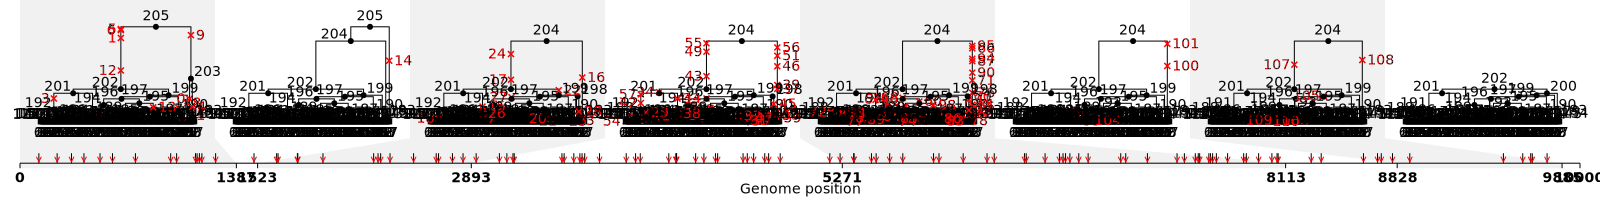

In [2]:
# msprime parameters
L, N = 10000, 100
mu = 1e-7 # mutation rate
population_size = 10000
seed = 45
duration=1E10
recombination_rate=1E-8

ts = msprime.sim_ancestry(
    N,
    population_size=population_size,
    ploidy=1,
    recombination_rate=recombination_rate,
    sequence_length=L,
    random_seed=seed,
    model=msprime.StandardCoalescent(duration=duration)
)

ts =  msprime.sim_mutations(
    ts, rate=mu, random_seed=seed, model="binary",
)

ts.draw_svg()

l=80, MAC=18


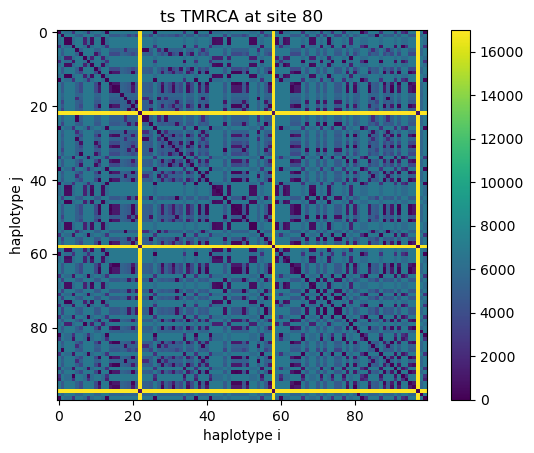

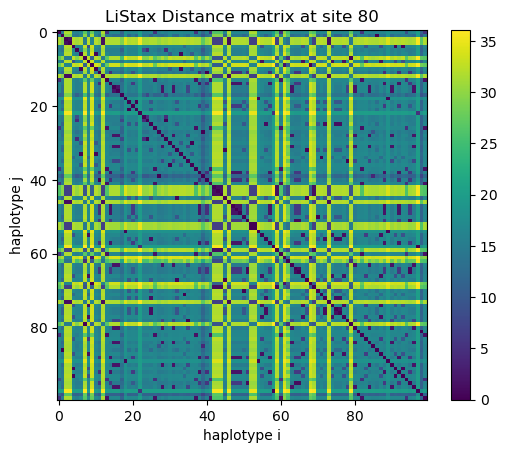

In [3]:
target_l = 80
import numpy as np

# (L sites, N haplotypes) haplotype matrix
h = get_ts_matrix(ts)

print(f"l={target_l}, MAC={torch.sum(h, dim=1)[target_l]}")

# distances between variants
m = torch.from_numpy(get_distances(ts)) * recombination_rate

model = LiStephens(h, m, gamma=1, N_est=population_size, mu=mu)
p, d, a, b = model.run(target_l=target_l)

plot_ts_tmrca(ts, l=target_l)
plot_model_distances(d, l=target_l)

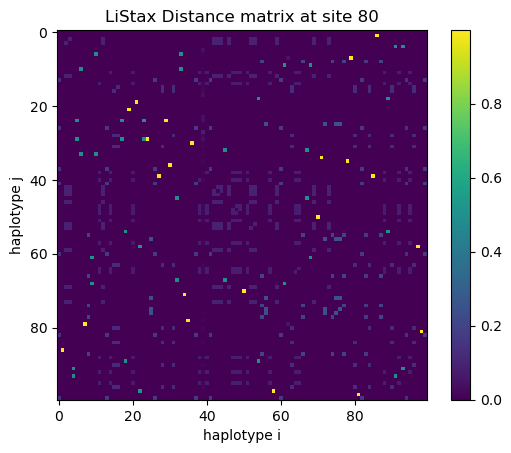

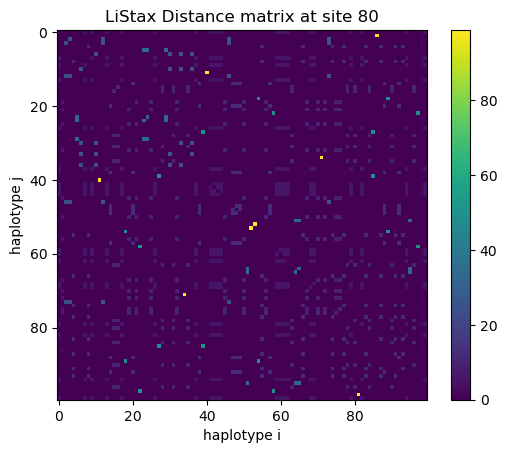

In [4]:
plot_model_distances(a, l=target_l)
plot_model_distances(b, l=target_l)